# HR Employee Attrition Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing all the necessary libraries.

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Here we read the CSV file in jupyter notebook.

In [3]:
df = pd.DataFrame(data=df)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Here we are loading the dataset into DataFrame.

# Data Inspection

In [4]:
df.shape

(1470, 35)

There are 1470 rows and 35 columns in our dataset.

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Few columns in the dataset are of integer datatype and few are of Object datatype.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 35 columns and no columns have null values and 26 columns are of integer data type , where as 9 are of object data type.

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Here "Attrition"  is our target variable. There are 35 columns And each column is well understood by it's name/title itself.

In [8]:
#Checking for Null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in the dataset.

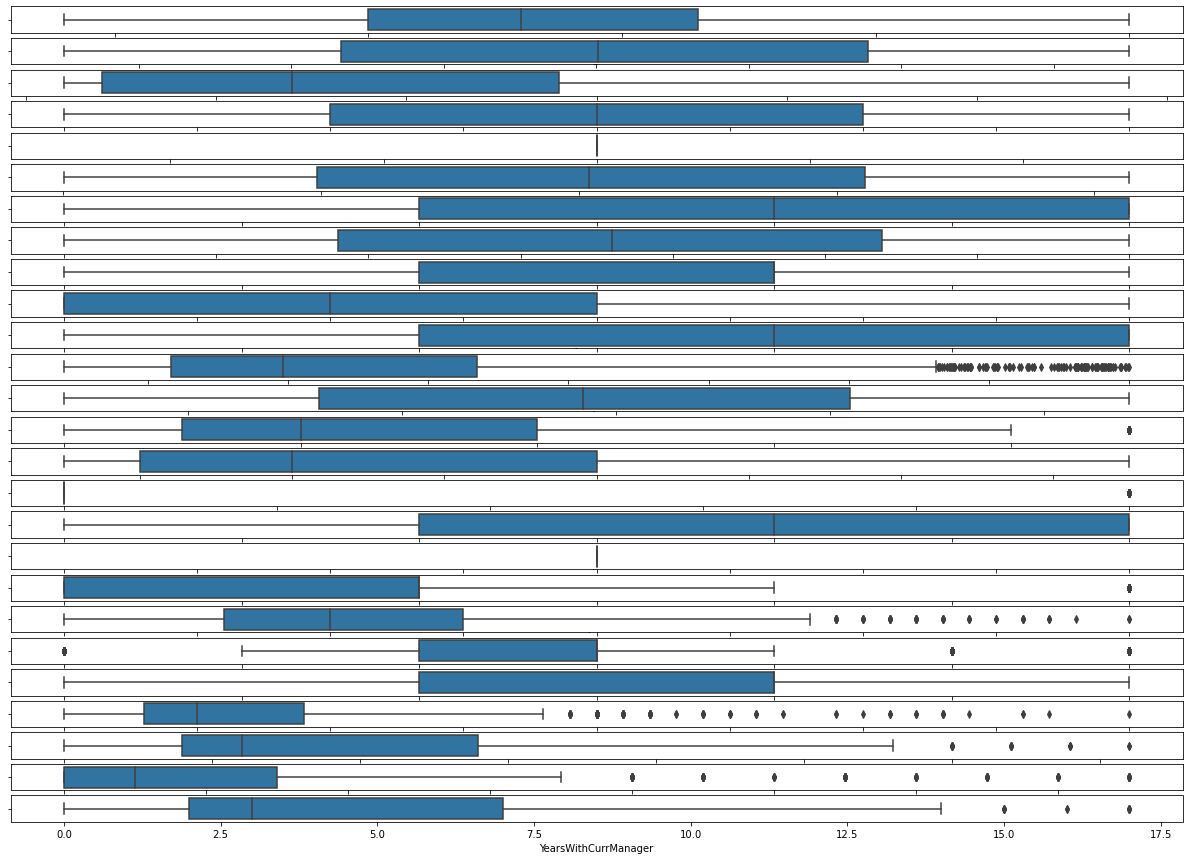

In [9]:
#Outlier Analysis
fig, axs = plt.subplots(26, figsize = (21,15))
plt1 = sn.boxplot(df['Age'], ax = axs[0])
plt2 = sn.boxplot(df['DailyRate'], ax = axs[1])
plt3 = sn.boxplot(df['DistanceFromHome'], ax = axs[2])
plt4 = sn.boxplot(df['Education'], ax = axs[3])
plt5 = sn.boxplot(df['EmployeeCount'], ax = axs[4])
plt6 = sn.boxplot(df['EmployeeNumber'], ax = axs[5])
plt7 = sn.boxplot(df['EnvironmentSatisfaction'], ax = axs[6])
plt8 = sn.boxplot(df['HourlyRate'], ax = axs[7])
plt9 = sn.boxplot(df['JobInvolvement'], ax = axs[8])
plt10 = sn.boxplot(df['JobLevel'], ax = axs[9])
plt11 = sn.boxplot(df['JobSatisfaction'], ax = axs[10])
plt12 = sn.boxplot(df['MonthlyIncome'], ax = axs[11])
plt13 = sn.boxplot(df['MonthlyRate'], ax = axs[12])
plt14 = sn.boxplot(df['NumCompaniesWorked'], ax = axs[13])
plt15 = sn.boxplot(df['PercentSalaryHike'], ax = axs[14])
plt16 = sn.boxplot(df['PerformanceRating'], ax = axs[15])
plt17 = sn.boxplot(df['RelationshipSatisfaction'], ax = axs[16])
plt18 = sn.boxplot(df['StandardHours'], ax = axs[17])
plt19 = sn.boxplot(df['StockOptionLevel'], ax = axs[18])
plt20 = sn.boxplot(df['TotalWorkingYears'], ax = axs[19])
plt21 = sn.boxplot(df['TrainingTimesLastYear'], ax = axs[20])
plt22 = sn.boxplot(df['WorkLifeBalance'], ax = axs[21])
plt23 = sn.boxplot(df['YearsAtCompany'], ax = axs[22])
plt24 = sn.boxplot(df['YearsInCurrentRole'], ax = axs[23])
plt25 = sn.boxplot(df['YearsSinceLastPromotion'], ax = axs[24])
plt26 = sn.boxplot(df['YearsWithCurrManager'], ax = axs[25])
plt.tight_layout()

There are outliers in Monthly Income, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager.

In [10]:
#Checking for skewness
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

There is skewness present in JobLevel, MonthlyIncome, NumCompaniesWorked, PerformanceRating, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole And YearsSinceLastPromotion

In [11]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

There are two types of category in attrition.

In [12]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Maximum Number of Employees(i.e. 1233 out of 1470) don't believe in "attrition"/"wearing away" while the rest 237 employees fall in category of 'Attrition.'

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

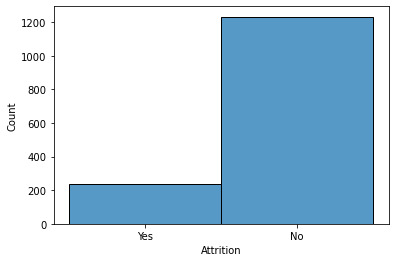

In [13]:
sn.histplot(df["Attrition"])

There exist class Imbalance in the target column, which we will have to treat later.

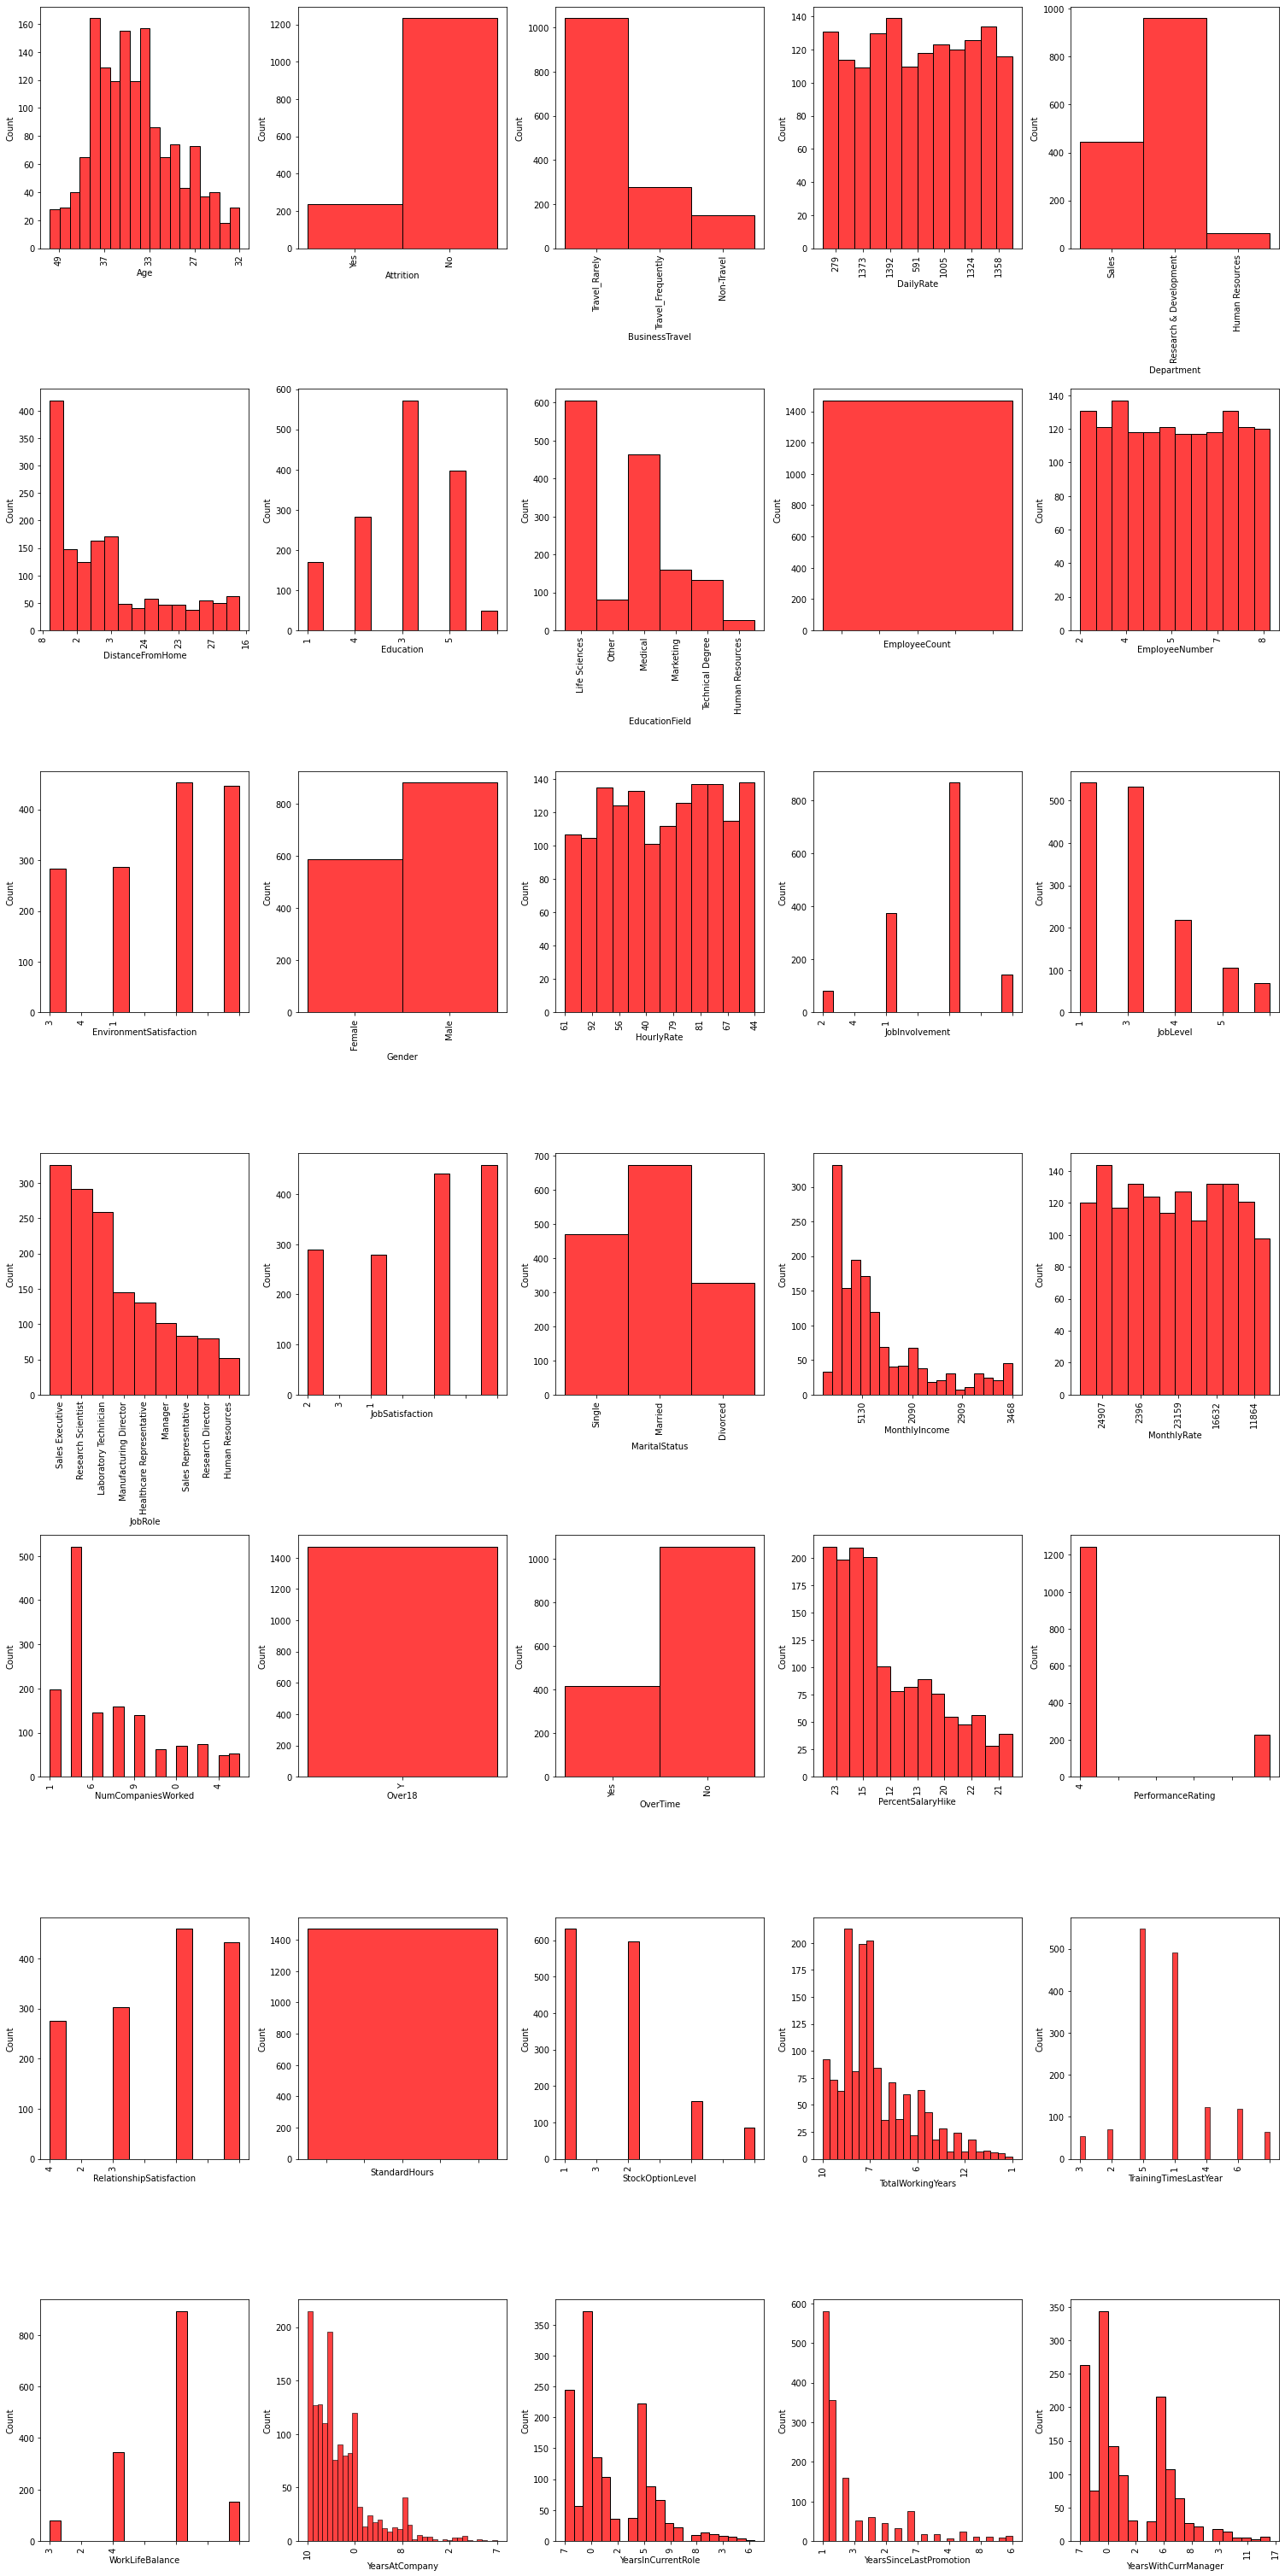

In [14]:
collist=df.columns.values
ncol=5
nrows=7
plt.figure(figsize=(3*nrows,6*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

We can see that columns "EmployeeCount", 'StandardHours' and "Over18" have only one unique value. Let's observe these columns more closely.

In [15]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

We can see that the column 'EmployeeCount' has only one unique value and it is not contributing to dataset, so we will remove it.

In [16]:
df['StandardHours'].unique()

array([80], dtype=int64)

We can see that the column 'StandardHours' has only one unique value and it is not contributing to dataset, so we will remove it.

In [17]:
df['Over18'].unique()

array(['Y'], dtype=object)

We can see that the column 'Over18' has only one unique value and it is not contributing to dataset, so we will remove it.

In [18]:
df.drop(["EmployeeCount" , "StandardHours" , "Over18"], axis=1, inplace=True)
df.shape

(1470, 32)

We have dropped the three columns successfully

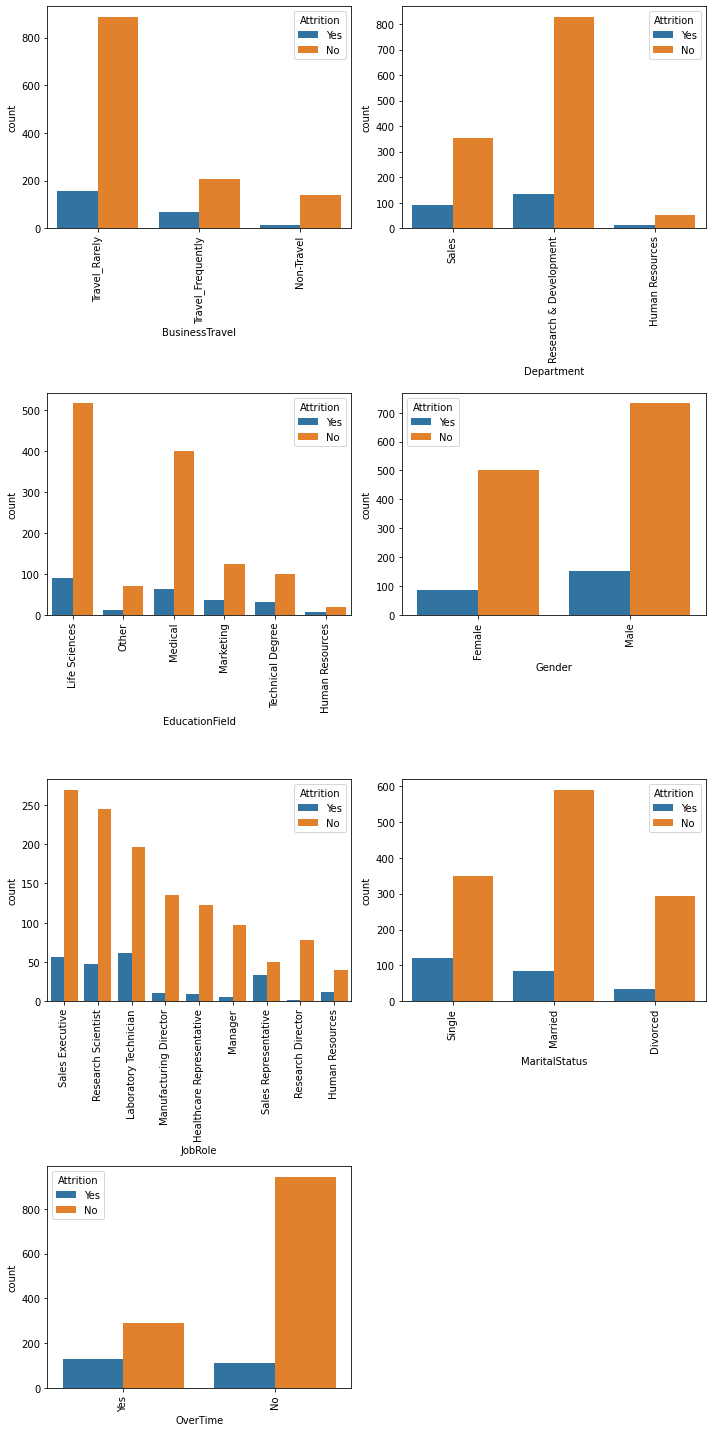

In [19]:
catcol= ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
plt.figure(figsize=(10,20))
for i in enumerate(catcol):
    plt.subplot(4,2,i[0]+1)
    sn.countplot(i[1],hue="Attrition",data=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

The Employees with maximum Attrition and Not both rarely go on BusinessTrips , both belong to the department "Sales and Developement" are from Education Field "Life Sciences" and are "Male" and doesn't do "overtime", whereas the rest columns have very distributed range.

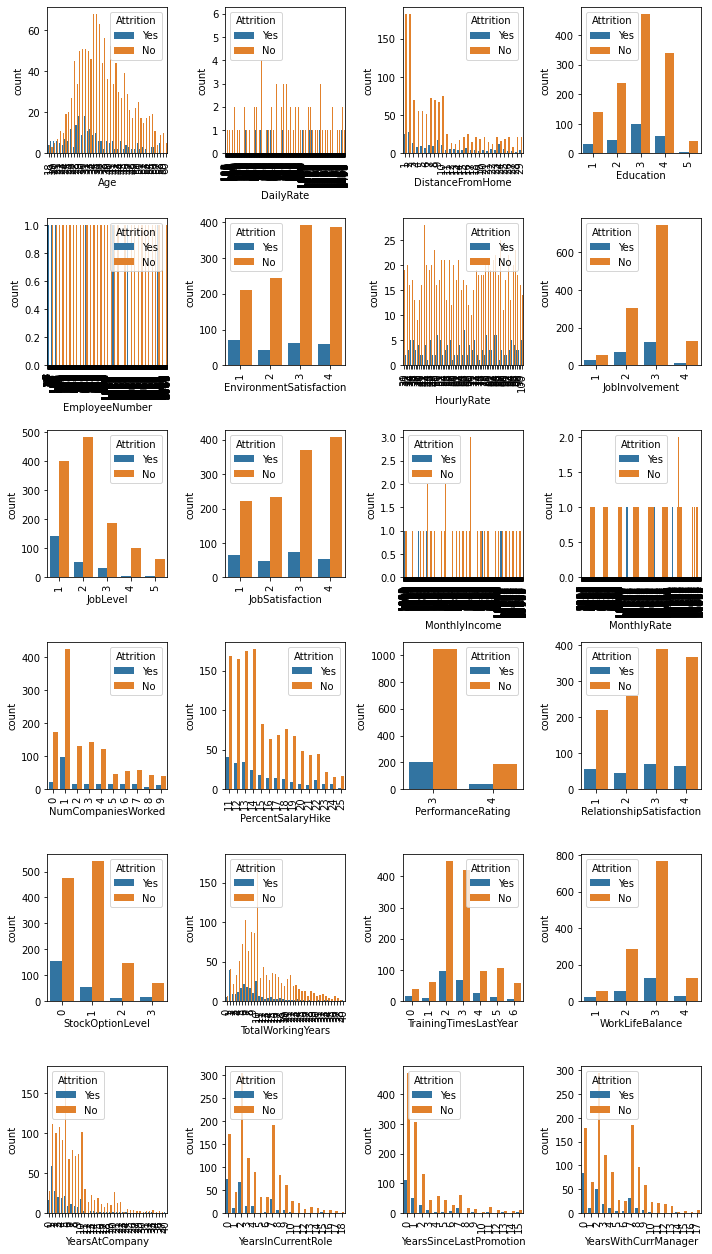

In [20]:
numcol = ['Age', 'DailyRate','DistanceFromHome', 'Education', 'EmployeeNumber','EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']
plt.figure(figsize=(10,20))
for i in enumerate(numcol):
    plt.subplot(7,4,i[0]+1)
    sn.countplot(i[1],hue="Attrition",data=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

This subplots are not clearly readable , let's read them in another way.

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

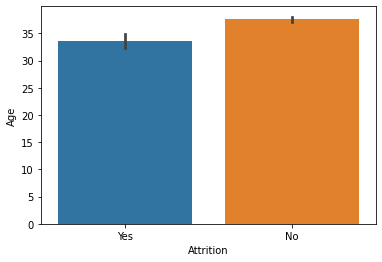

In [21]:
sn.barplot(y=df['Age'], x=df['Attrition'])

Young Employee Change their jobs more frequently than the aged employees.

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

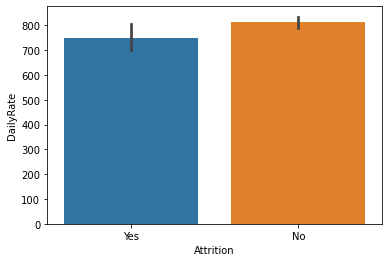

In [22]:
sn.barplot(y=df['DailyRate'], x=df['Attrition'])

Employess with less DailyRate are more likely to change their Jobs.

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

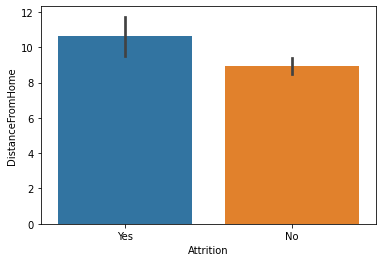

In [23]:
sn.barplot(y=df['DistanceFromHome'], x=df['Attrition'])

Employees with larger Distances between their workplace and Home are more likely to change their jobs.

<AxesSubplot:xlabel='Attrition', ylabel='EmployeeNumber'>

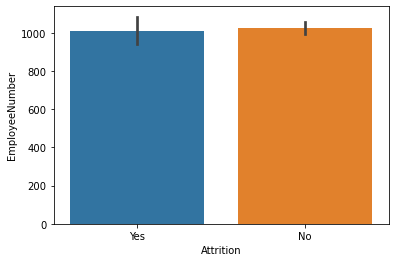

In [24]:
sn.barplot(y=df['EmployeeNumber'], x=df['Attrition'])

Employee Number does not much contribute to the Attrition Prediction.

<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

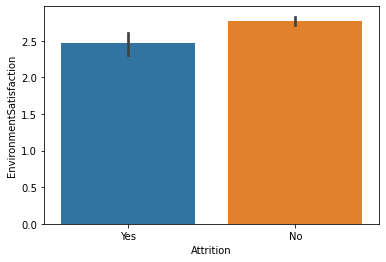

In [25]:
sn.barplot(y=df['EnvironmentSatisfaction'], x=df['Attrition'])

Employees who are satisfied with the work place Environment are less likely to change their jobs.

<AxesSubplot:xlabel='Attrition', ylabel='JobInvolvement'>

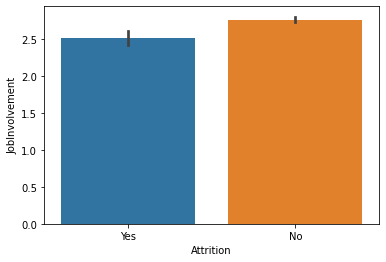

In [26]:
sn.barplot(y=df['JobInvolvement'], x=df['Attrition'])

Employees who feel more involved in their jobs and have chance to learn more and be better even while working , are less likely to shift their companies.

<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

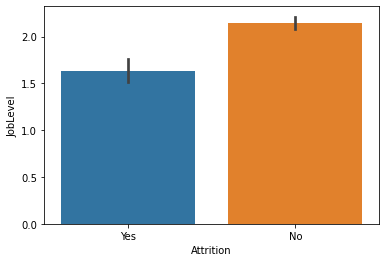

In [27]:
sn.barplot(y=df['JobLevel'], x=df['Attrition'])

Employees on a higher designation are less likely to change their jobs.

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

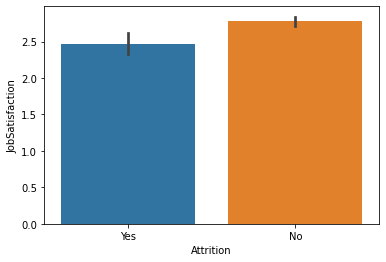

In [28]:
sn.barplot(y=df['JobSatisfaction'], x=df['Attrition'])

Employees with much job satisfaction are less likely to change their Jobs.

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

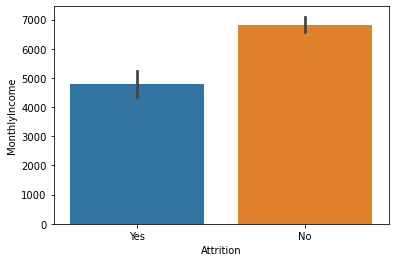

In [29]:
sn.barplot(y=df['MonthlyIncome'], x=df['Attrition'])

Employees with less Monthly Income are more likely to change their jobs.

<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

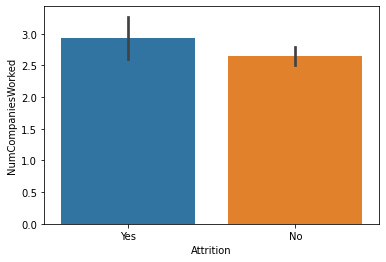

In [30]:
sn.barplot(y=df['NumCompaniesWorked'], x=df['Attrition'])

Employees who have worked in lot number of companies are more likely to chnage their jobs. Number of companies worked is directly proportional to attrition.

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

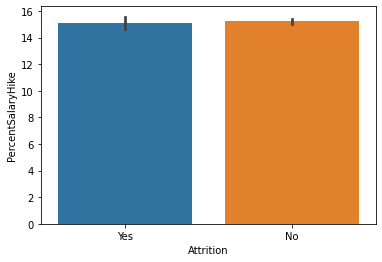

In [31]:
sn.barplot(y=df['PercentSalaryHike'], x=df['Attrition'])

There's is just a slight difference in both the bars, and it is clear from the graph that Employees Receiving Higher Salary Hike are Less likely to change their jobs.

<AxesSubplot:xlabel='Attrition', ylabel='PerformanceRating'>

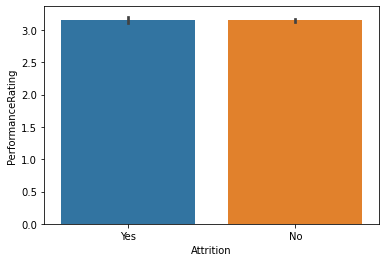

In [32]:
sn.barplot(y=df['PerformanceRating'], x=df['Attrition'])

Performance Rating does not much contribute to the Attrition Prediction.

<AxesSubplot:xlabel='Attrition', ylabel='RelationshipSatisfaction'>

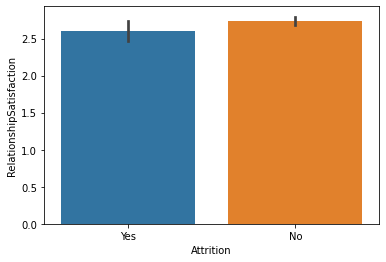

In [33]:
sn.barplot(y=df['RelationshipSatisfaction'], x=df['Attrition'])

Relationship Satisfaction is inversly proportional to "Attrition"

<AxesSubplot:xlabel='Attrition', ylabel='StockOptionLevel'>

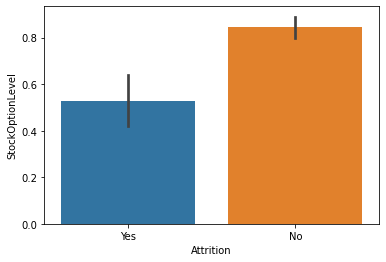

In [34]:
sn.barplot(y=df['StockOptionLevel'], x=df['Attrition'])

StockOptionLevel is inversly proportional to "Attrition"

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

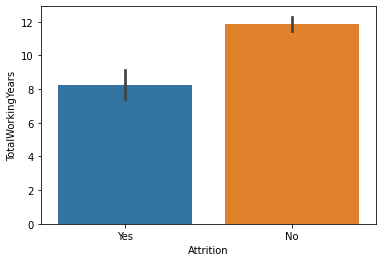

In [35]:
sn.barplot(y=df['TotalWorkingYears'], x=df['Attrition'])

Total Working years is inversly proportional to "Attrition"

<AxesSubplot:xlabel='Attrition', ylabel='TrainingTimesLastYear'>

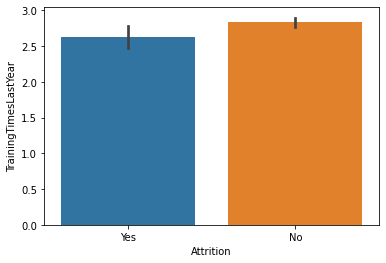

In [36]:
sn.barplot(y=df['TrainingTimesLastYear'], x=df['Attrition'])

Training Times Last Year is inversly proportional to "Attrition"

<AxesSubplot:xlabel='Attrition', ylabel='WorkLifeBalance'>

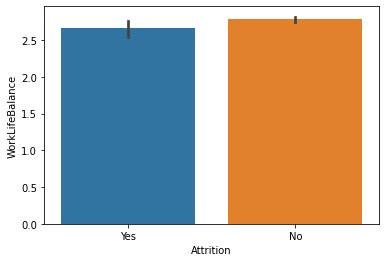

In [37]:
sn.barplot(y=df['WorkLifeBalance'], x=df['Attrition'])

Work-LifeBalance is inversly proportional to "Attrition"

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

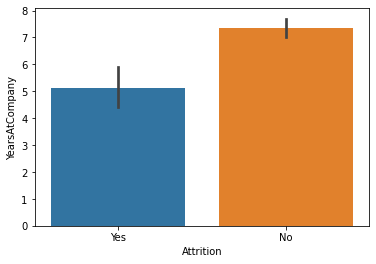

In [38]:
sn.barplot(y=df['YearsAtCompany'], x=df['Attrition'])

Higher The Years At Company, Less the rate of attrition.

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

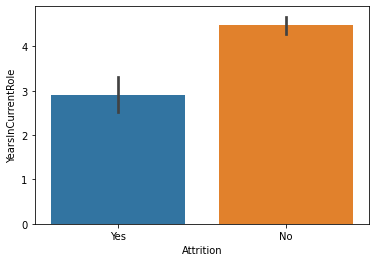

In [39]:
sn.barplot(y=df['YearsInCurrentRole'], x=df['Attrition'])

"Years In Current Role" is inversly proportional to "Attrition"

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

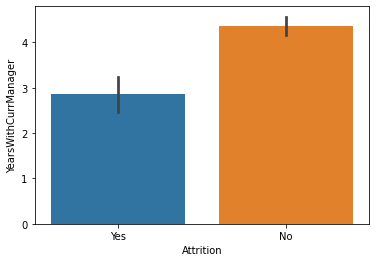

In [40]:
sn.barplot(y=df['YearsWithCurrManager'], x=df['Attrition'])

Higher the Number of Years Spent With Current Manager , Lesser is the "attrition" rate. Hence "YearsWithCurrManager" is indirectly Proportional to the "Attrition"

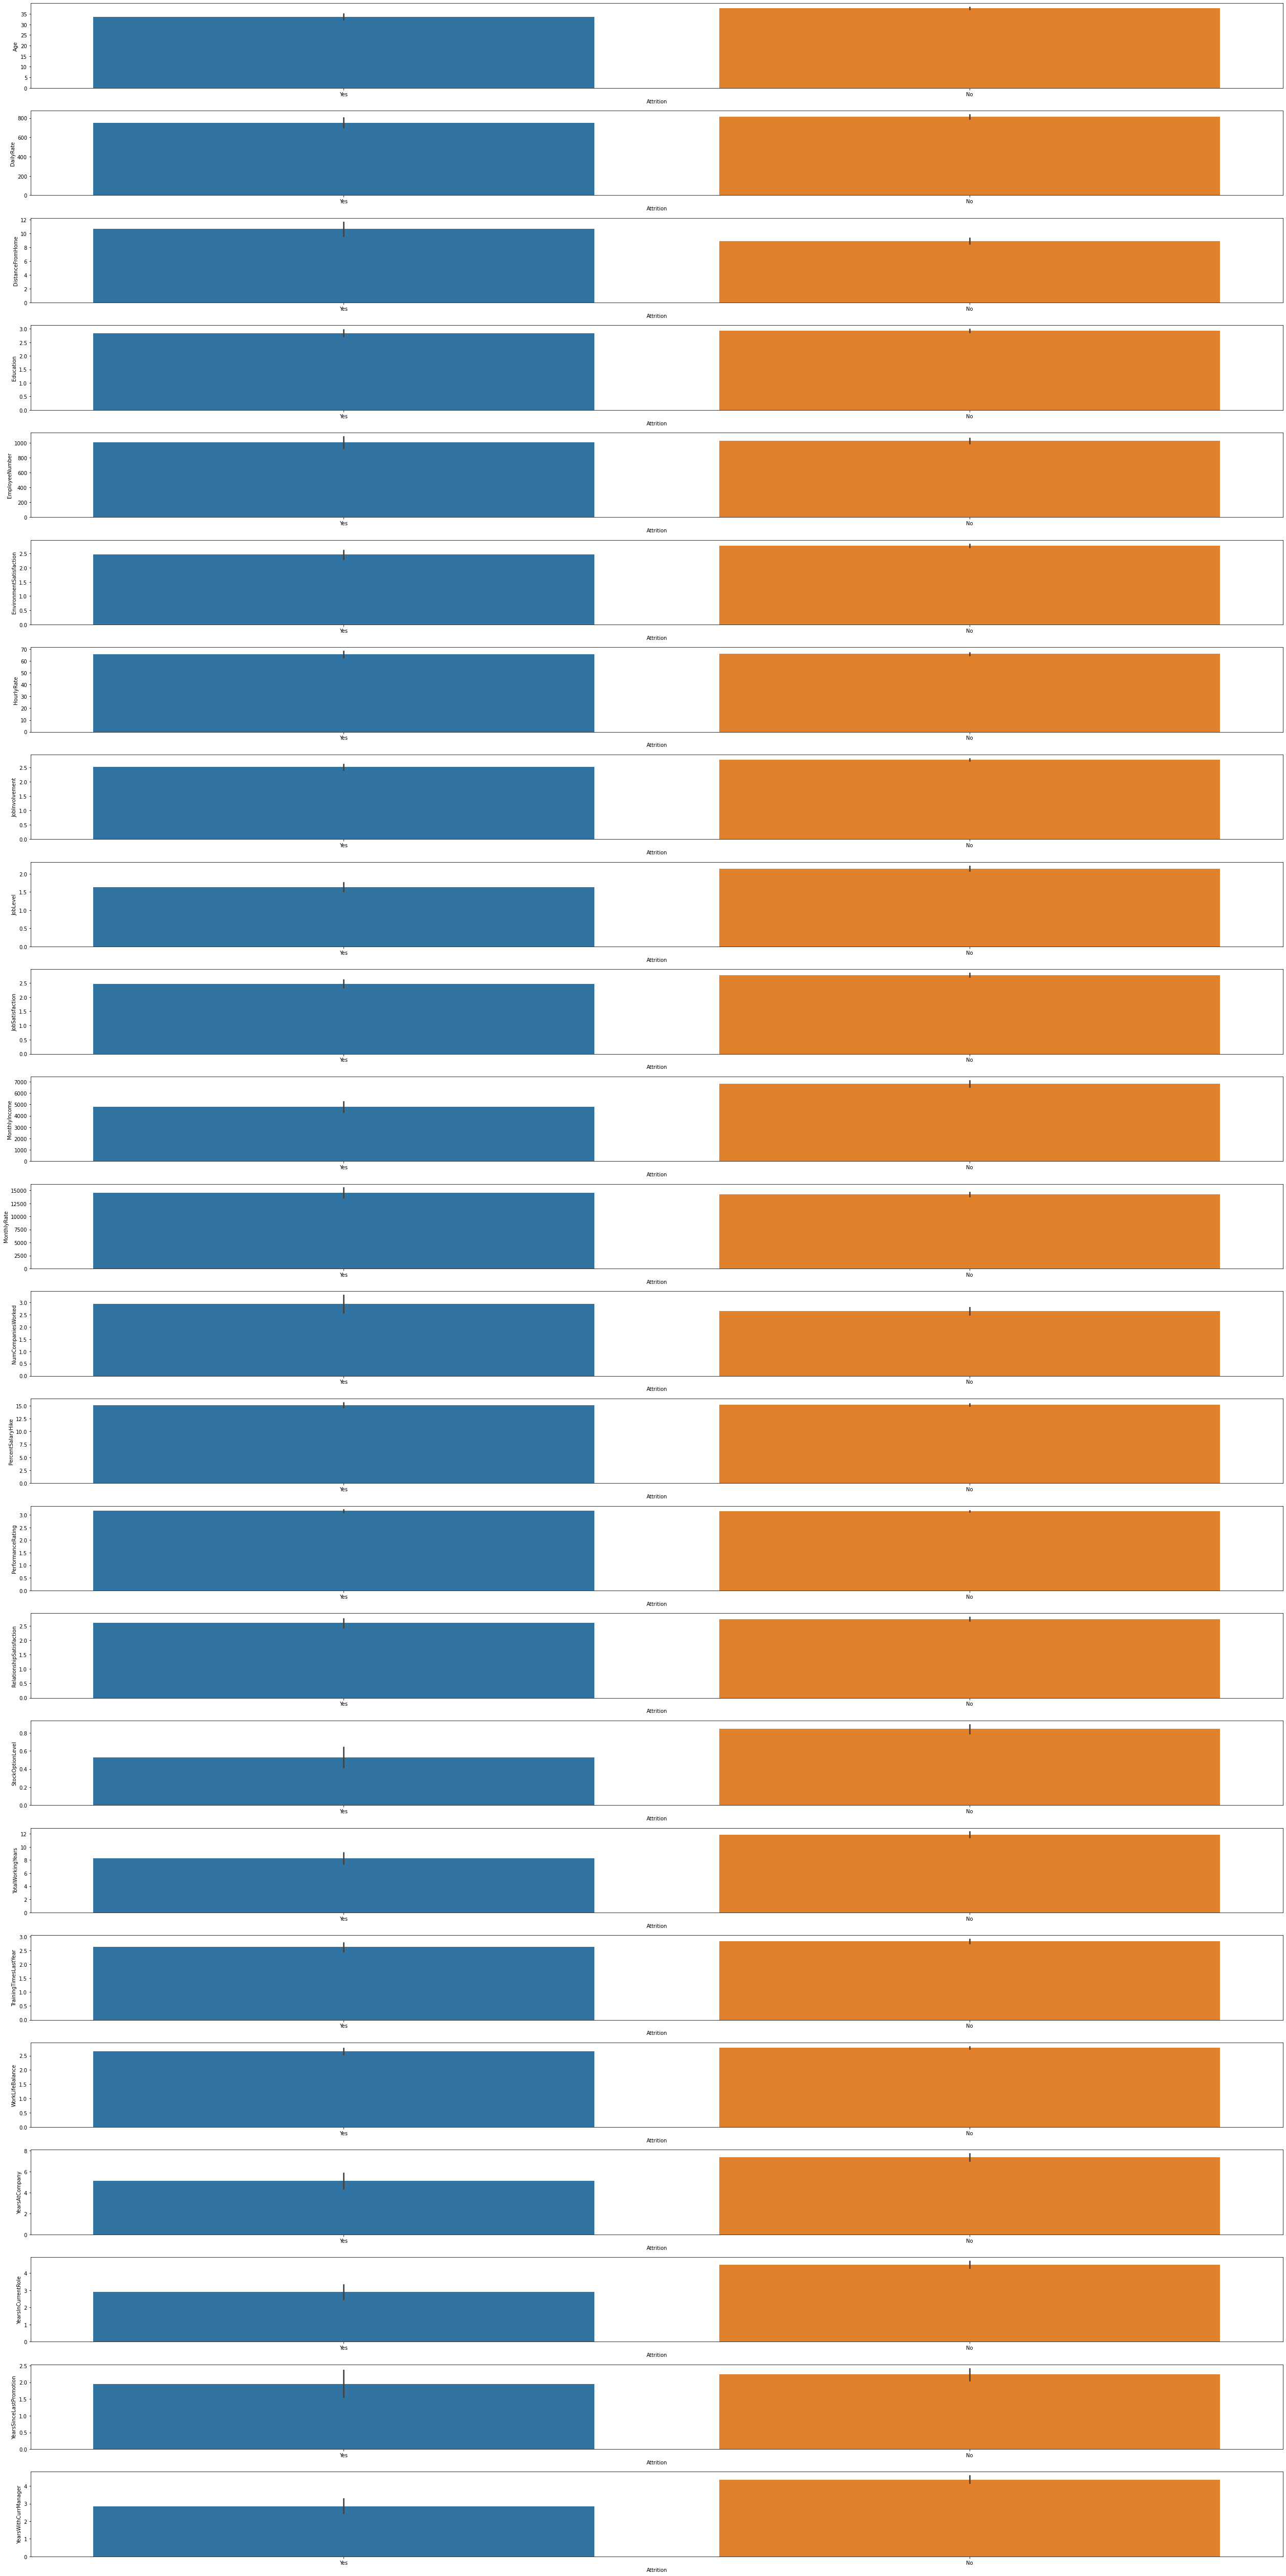

In [41]:
fig, axs = plt.subplots(24, figsize = (35,70))
plt1 = sn.barplot(y=df['Age'], x=df['Attrition'], ax = axs[0])
plt2 = sn.barplot(y=df['DailyRate'], x=df['Attrition'], ax=axs[1])
plt3 = sn.barplot(y=df['DistanceFromHome'], x=df['Attrition'], ax=axs[2])
plt4 = sn.barplot(y=df['Education'], x=df['Attrition'], ax=axs[3])
plt5 = sn.barplot(y=df['EmployeeNumber'], x=df['Attrition'], ax=axs[4])
plt6 = sn.barplot(y=df['EnvironmentSatisfaction'], x=df['Attrition'], ax=axs[5])
plt7 = sn.barplot(y=df['HourlyRate'], x=df['Attrition'], ax=axs[6])
plt8 = sn.barplot(y=df['JobInvolvement'], x=df['Attrition'], ax=axs[7])
plt9 = sn.barplot(y=df['JobLevel'], x=df['Attrition'], ax=axs[8])
plt10 = sn.barplot(y=df['JobSatisfaction'], x=df['Attrition'],ax=axs[9])
plt11 = sn.barplot(y=df['MonthlyIncome'], x=df['Attrition'], ax=axs[10])
plt12 = sn.barplot(y=df['MonthlyRate'], x=df['Attrition'], ax=axs[11])
plt13 = sn.barplot(y=df['NumCompaniesWorked'], x=df['Attrition'], ax=axs[12])
plt14 = sn.barplot(y=df['PercentSalaryHike'], x=df['Attrition'], ax=axs[13])
plt15 = sn.barplot(y=df['PerformanceRating'], x=df['Attrition'],ax=axs[14])
plt16 = sn.barplot(y=df['RelationshipSatisfaction'], x=df['Attrition'], ax=axs[15])
plt17 = sn.barplot(y=df['StockOptionLevel'], x=df['Attrition'], ax=axs[16])
plt18 = sn.barplot(y=df['TotalWorkingYears'], x=df['Attrition'], ax=axs[17])
plt19 = sn.barplot(y=df['TrainingTimesLastYear'], x=df['Attrition'],ax=axs[18])
plt20 = sn.barplot(y=df['WorkLifeBalance'], x=df['Attrition'], ax=axs[19])
plt21 = sn.barplot(y=df['YearsAtCompany'], x=df['Attrition'],ax=axs[20])
plt22 = sn.barplot(y=df['YearsInCurrentRole'], x=df['Attrition'], ax=axs[21])
plt23 = sn.barplot(y=df['YearsSinceLastPromotion'], x=df['Attrition'], ax=axs[22])
plt24 = sn.barplot(y=df['YearsWithCurrManager'], x=df['Attrition'], ax=axs[23])
plt.tight_layout()

This is a graph of all numerical columns together against "Attrition". Here we can clearly see that PerformanceRating and EmployeeNumber does not help us in Predicting the attrition.

In [42]:
df.drop(['PerformanceRating','EmployeeNumber'],axis=1,inplace=True)

We have dropped two columns successfully which are not adding to the "attrition" prediction.

In [43]:
le = LabelEncoder()
dflist=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
#dflist = dflist.astype('category')
for column in dflist:
    df[column]=le.fit_transform(df[column])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,17,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,15,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,20,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,14,4,0,17,3,2,9,6,0,8


We have Changed the categorical data to ordinal data. Now In "Attrition" , 1 stands for Yes and 0 stands for No.

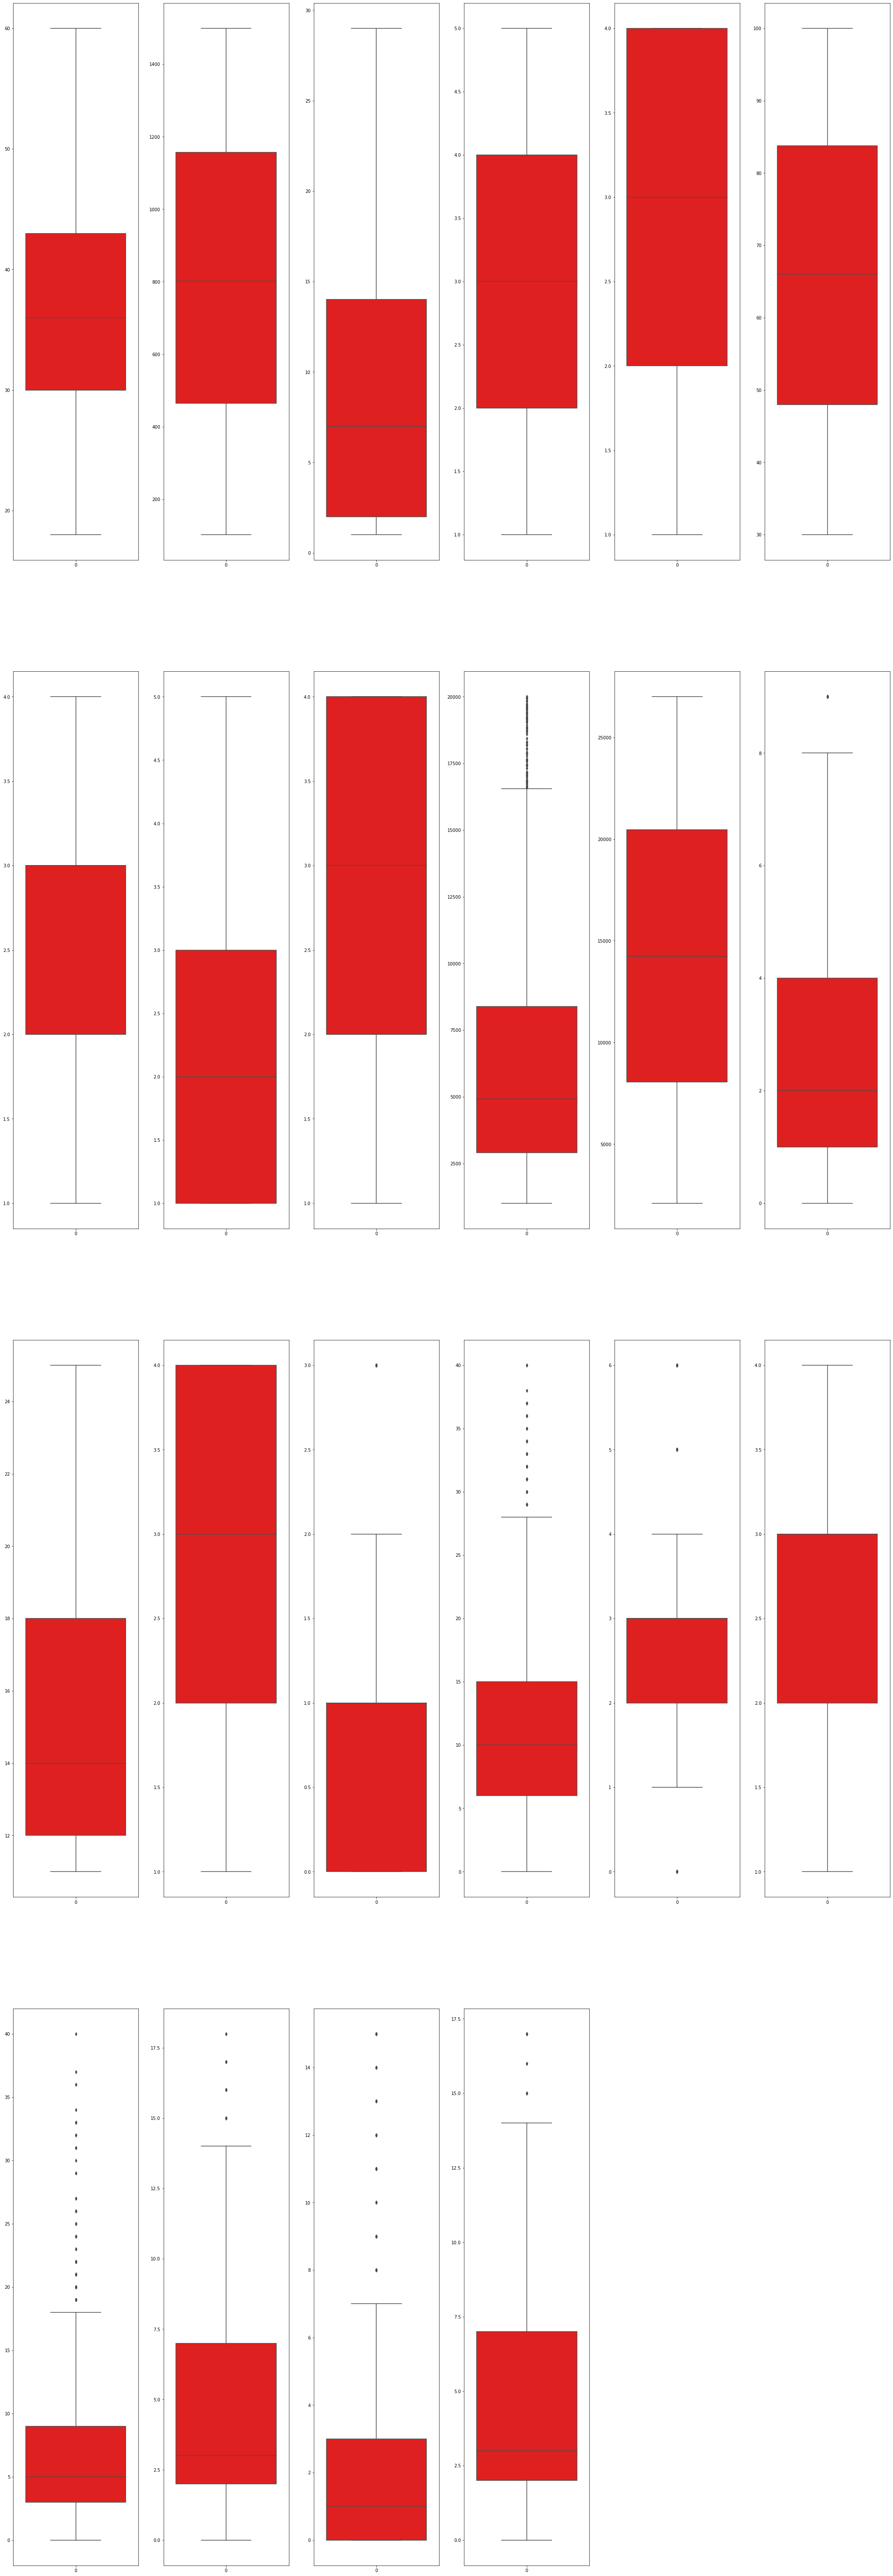

In [44]:
numcolnew= ['Age', 'DailyRate','DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']
ncol=36
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(numcolnew)):
    plt.subplot(4,6,i+1)
    sn.boxplot(data=df[numcolnew[i]],color='red',orient='v')

We can see that there are many outliers present in so many columns. We will have to treat them. 

# Multivariate Analysis

<AxesSubplot:>

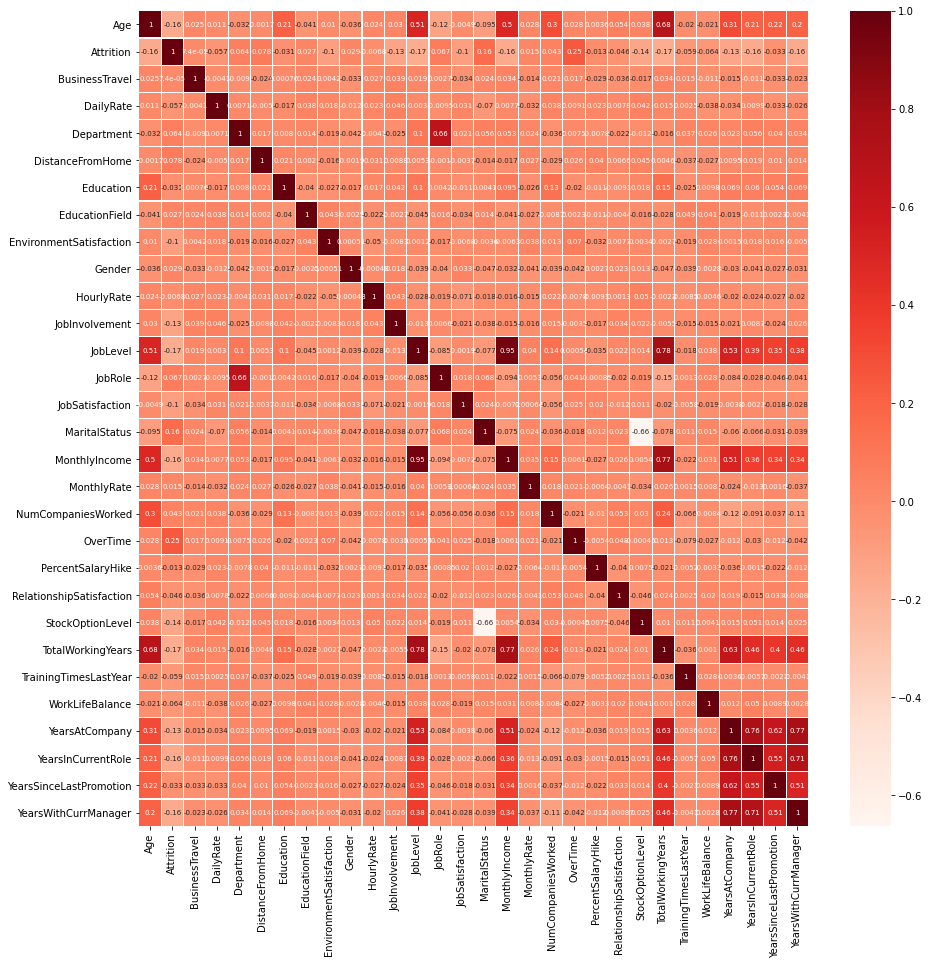

In [45]:
plt.figure(figsize=(15,15))
sn.heatmap(df.corr(), linewidths=.1, cmap="Reds", annot=True, annot_kws={"size":7})

There Exists Multi-colinearity between JobLevel and MonthlyIncome.  

# Variance Inflation Factor

In [46]:
from scipy import stats
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
def calc_vif(x):
    vf = pd.DataFrame()
    vf['variables']=x.columns
    vf['VIF FACTOR']= [vif(x.values,i) for i in range(x.shape[1])]
    return vf
x1= df.drop(['Attrition'],axis=1)
calc_vif(x1)

,variables,VIF FACTOR
0,Age,32.333301
1,BusinessTravel,6.633467
2,DailyRate,4.944893
3,Department,12.952509
4,DistanceFromHome,2.314190
5,Education,9.387247
6,EducationField,3.834849
7,EnvironmentSatisfaction,7.004462
8,Gender,2.494526
9,HourlyRate,10.890120


We have to drop "JobLevel" to reduce the multicolinearity.

In [47]:
x=x1.drop(["JobLevel"],axis=1)

x contains all our feature variables.

# Data Cleaning

In [48]:
import scipy
from scipy.stats import zscore
dfzscore=np.abs(zscore(df[numcolnew]))
print(np.where(dfzscore>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([21, 20, 18, 20, 19, 20, 15, 15, 18, 20, 19, 20, 21, 15, 18, 20, 21,
       20, 15, 21, 18, 19, 20, 19, 21, 18, 20, 15, 18, 19, 20, 20, 21, 15,
       18, 18, 20, 20, 15, 19, 18, 18, 20, 18, 21, 20, 18, 15, 18, 20, 21,
       15, 21, 18, 20, 

We have located all the outliers from the numerical columns.

In [49]:
dfnew=df[(dfzscore<3).all(axis=1)]
df=dfnew
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,17,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,15,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,20,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,14,4,0,17,3,2,9,6,0,8


We have successfully removed all the outliers. Now there are 1387 rows and 30 columns in the dataset.

In [50]:
((1470-1387)/1470)*100

5.646258503401361

There is 5.6462 % data loss after removing the outliers which is under acceptable range.

In [51]:
df[numcolnew].skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

There is alot skewness in the data with integer dtypes. Let's apply Power Transformation to reduce it.

In [52]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.52213976,  0.63546836,  0.7592893 , ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.39286498, -1.33459724, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  0.63546836,  1.34036452, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507,  0.63546836, -1.75171312, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -1.39286498,  0.58323545, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832,  0.63546836, -0.35884464, ..., -0.08961473,
         0.09685415, -0.40688122]])

We have treated the skewness. 

# Treating Class Imbalance

In [53]:
y=df['Attrition']
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x=df.drop(['Attrition'],axis=1)
y=df["Attrition"]
x,y = smt.fit_resample(x,y)
y

0       1
1       0
2       1
3       0
4       0
       ..
2311    1
2312    1
2313    1
2314    1
2315    1
Name: Attrition, Length: 2316, dtype: int32

Over_sampling the data to remove Class Imbalance.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

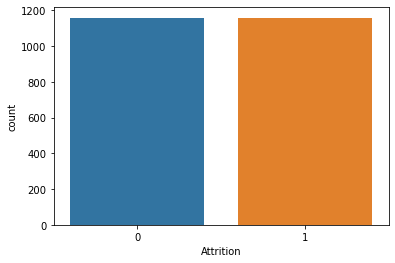

In [54]:
sn.countplot(y)

Now both the classes have balanced.

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.7263023 ,  0.74948239,  0.83944468, ...,  0.26781284,
        -0.67166423,  0.61092785],
       [ 1.64430004, -0.78255752, -1.33483402, ...,  1.2644725 ,
        -0.24075721,  1.26948448],
       [ 0.26730342,  0.74948239,  1.55539794, ..., -1.06106671,
        -0.67166423, -1.03546371],
       ...,
       [-0.76544404,  0.74948239, -0.79060387, ..., -1.06106671,
        -0.67166423, -1.03546371],
       [ 0.84105201,  0.74948239,  0.51713363, ...,  0.26781284,
         0.62105685,  0.28164954],
       [-1.68344178,  0.74948239, -0.40488736, ..., -1.06106671,
        -0.67166423, -1.03546371]])

We are standarizing the feature variables.

# Model Building

In [56]:
lr=LogisticRegression()

l=[]
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.30)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(accuracy_score(ytrain,pred_train)*100,1)==round(accuracy_score(ytest,pred_test)*100,1):
        print("At Random state",i,"The model performs very well")
        print("At Random state:-",i)
        print("Training accuracy is :",accuracy_score(ytrain,pred_train)*100)
        print("Testing accuracy is:",accuracy_score(ytest,pred_test)*100)
        print("\n")
        l.append(i)
        
print(l)        

At Random state 31 The model performs very well
At Random state:- 31
Training accuracy is : 83.28192473781615
Testing accuracy is: 83.30935251798562


At Random state 34 The model performs very well
At Random state:- 34
Training accuracy is : 83.7137569401604
Testing accuracy is: 83.7410071942446


At Random state 144 The model performs very well
At Random state:- 144
Training accuracy is : 83.15854410857494
Testing accuracy is: 83.16546762589928


At Random state 187 The model performs very well
At Random state:- 187
Training accuracy is : 83.5903763109192
Testing accuracy is: 83.59712230215828


At Random state 215 The model performs very well
At Random state:- 215
Training accuracy is : 83.34361505243677
Testing accuracy is: 83.30935251798562


At Random state 224 The model performs very well
At Random state:- 224
Training accuracy is : 83.28192473781615
Testing accuracy is: 83.30935251798562


At Random state 238 The model performs very well
At Random state:- 238
Training accuracy 

Finding the best Random State.

In [57]:
dt = DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=34)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7899280575539568
[[278  79]
 [ 67 271]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       357
           1       0.77      0.80      0.79       338

    accuracy                           0.79       695
   macro avg       0.79      0.79      0.79       695
weighted avg       0.79      0.79      0.79       695



Decision Tree Classifier has 78.99% accuracy.

In [58]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
pred_test_lr=lr.predict(x_test)
print(accuracy_score(y_test,pred_test_lr))
print(confusion_matrix(y_test,pred_test_lr))
print(classification_report(y_test,pred_test_lr))

0.8402877697841726
[[300  57]
 [ 54 284]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       357
           1       0.83      0.84      0.84       338

    accuracy                           0.84       695
   macro avg       0.84      0.84      0.84       695
weighted avg       0.84      0.84      0.84       695



Logistic Regression has 84.02% accuracy.

In [59]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9050359712230216
[[330  27]
 [ 39 299]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       357
           1       0.92      0.88      0.90       338

    accuracy                           0.91       695
   macro avg       0.91      0.90      0.90       695
weighted avg       0.91      0.91      0.90       695



Random Forest classifier has 90.50% accuracy.

In [60]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)
print(accuracy_score(y_test,predkn))
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

0.8258992805755395
[[246 111]
 [ 10 328]]
              precision    recall  f1-score   support

           0       0.96      0.69      0.80       357
           1       0.75      0.97      0.84       338

    accuracy                           0.83       695
   macro avg       0.85      0.83      0.82       695
weighted avg       0.86      0.83      0.82       695



KNieghborsClassifier has 82.58% accuracy.

In [61]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.9093525179856116
[[328  29]
 [ 34 304]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       357
           1       0.91      0.90      0.91       338

    accuracy                           0.91       695
   macro avg       0.91      0.91      0.91       695
weighted avg       0.91      0.91      0.91       695



Support Vector Machine Classifier has 90.93% accuracy.

# Accuracy Score of all the Models

In [62]:
print("Accuracy of Decision Tree Classifier = ",accuracy_score(y_test,preddt)*100,"%")
print("Accuracy of Logistic Regression = ",accuracy_score(y_test,pred_test_lr)*100,"%")
print("Accuracy of Random Forest Classifier =",accuracy_score(y_test,predrf)*100,"%")
print("Accuracy of K-Neighbor Classifier =",accuracy_score(y_test,predkn)*100,"%")
print("Accuracy of Support Vector Machine Classifier = ",accuracy_score(y_test,predsv)*100,"%")

Accuracy of Decision Tree Classifier =  78.99280575539568 %
Accuracy of Logistic Regression =  84.02877697841727 %
Accuracy of Random Forest Classifier = 90.50359712230215 %
Accuracy of K-Neighbor Classifier = 82.58992805755395 %
Accuracy of Support Vector Machine Classifier =  90.93525179856115 %


We have printed accuracy of all the models together.

# Cross Validation Score

In [63]:
print("CVS for DecisionTree Classifier =",cvs(dt,x,y,cv=5).mean()*100,"%")
print("CVS for Logistic Regression =",cvs(lr,x,y,cv=5).mean()*100,"%")
print("CVS for Random Forest Classifier =",cvs(rf,x,y,cv=5).mean()*100,"%")
print("CVS for K-Neighbor Classifier =",cvs(kn,x,y,cv=5).mean()*100,"%")
print("CVS for Support Vector Machine Classifier =",cvs(sv,x,y,cv=5).mean()*100,"%")

CVS for DecisionTree Classifier = 80.74811946078796 %
CVS for Logistic Regression = 81.3966262009384 %
CVS for Random Forest Classifier = 90.16273180904149 %
CVS for K-Neighbor Classifier = 84.84555373501156 %
CVS for Support Vector Machine Classifier = 88.13500782006406 %


The least difference between accuracy score and cross validation score is of "Random Forest Classifier".

# Hyper Parameter Tuning

In [64]:
parameter={'n_estimators':np.arange(50,350,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(x_train,y_train)
gvc.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 150}

We get the best parameters to be used in RandomForestClassifier() to increase it's accuracy.

In [65]:
HR = RandomForestClassifier(criterion='gini',n_estimators=150,max_features='log2',class_weight='balanced')
HR.fit(x_train,y_train)
pred=HR.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classifier of Final HR Model:",acc*100,"%")

Accuracy of Random Forest Classifier of Final HR Model: 91.79856115107914 %


Our Final Model has 91.79% accuracy which is good.

# AUC-ROC CURVE

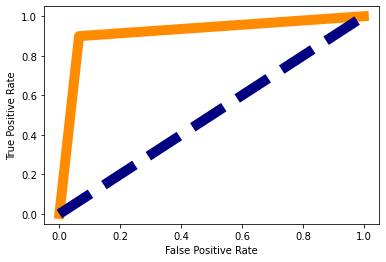

In [66]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE")
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Since the model without outliers and Class Imbalance is working welll. Hence we will choose that only.

# Model Saving

In [67]:
import pickle
filename = 'HR.pkl'
pickle.dump(HR,open(filename,'wb'))

We have saved our final model .

# Conclusion

In [68]:
a= np.array(y_test)
predicted = np.array(HR.predict(x_test))
HR=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
HR

,Original,Predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
690,0,0
691,0,0
692,1,1
693,1,1


We can see that Original Value is equal to the Predicted value for more than 90% of the data. Our model is really working well.